In [45]:
from scipy import signal
import plotly.express as px
import pandas as pd
import numpy as np
import datetime

import os

In [71]:


df=pd.read_csv("parameters.csv")

df

,a,b,c,notes
0,30.1,4.6,230,first test
1,3.0,40.0,50,just a change
2,1.0,20.0,30,ABC line


30.1 4.6 230 first test
3.0 40.0 50 just a change
1.0 20.0 30 ABC line
Step  (2022-01-19 23:19:52.654592)


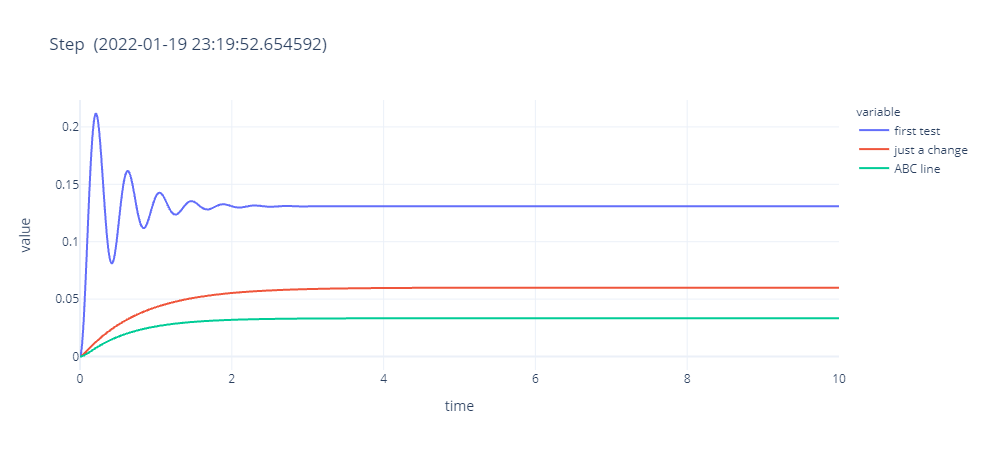

In [88]:
d={}    
T = np.linspace(0, 10, 1000)
d["time"]=T
for index, row in df.iterrows():
    a=float(row['a'])
    b=float(row['b'])
    c=float(row['c'])
    key=row['notes']
    lti = signal.lti([a], [1, b, c])
    t, y = signal.step(lti,T=T)
    d[key]=y
    print(row['a'], row['b'], row['c'], row['notes'])

    
    
title_str="Step  ("+str(datetime.datetime.now())+")"

print(title_str)
data=pd.DataFrame(d)
data.set_index('time',inplace=True)



fig = px.line(data,y=list(data.columns),title=title_str)

os.remove("plot.png")              
fig.write_image("plot.png")
fig.show()